<a href="https://colab.research.google.com/github/kedarkotwal1/FraudJobDetection/blob/main/FakeJobPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import pandas as pd
import nltk
import numpy as np
import re
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width',None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
mydf = pd.read_csv('fake_job.csv')

In [ ]:
print(mydf.head())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [ ]:
print(mydf.info())
print(mydf.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

# Creating a copy of mydf and storing it into jobdf

In [ ]:
jobdf = mydf.copy()

In [ ]:
print(jobdf.head(2))

   job_id                                      title          location  \
0       1                           Marketing Intern  US, NY, New York   
1       2  Customer Service - Cloud Video Production    NZ, , Auckland   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...    

#Percent of null values present in each feature

In [ ]:
total = jobdf.isnull().sum().sort_values(ascending=False)
percent_1 = jobdf.isnull().sum()/jobdf.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total','%'])
missing_data

,Total,%
salary_range,15012,84.0
department,11547,64.6
required_education,8105,45.3
benefits,7210,40.3
required_experience,7050,39.4
function,6455,36.1
industry,4903,27.4
employment_type,3471,19.4
company_profile,3308,18.5
requirements,2695,15.1


#Total Null values in the dataset

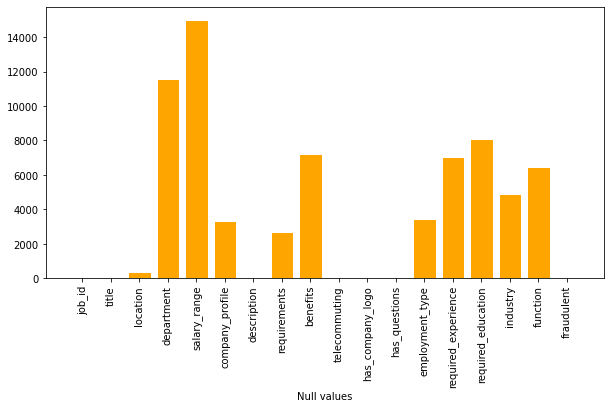

In [ ]:
nullval = jobdf.isnull().sum()
plt.figure(figsize=(10,5))
plt.bar(jobdf.columns,nullval,color = 'orange', edgecolor = 'white')
plt.xlabel('Null values')
plt.xticks(rotation='vertical')
plt.show()

Same chart but horizontal

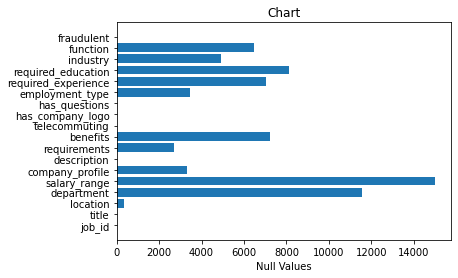

In [ ]:
#plt.rcdefaults()
fig, ax = plt.subplots()
#plt.figure(figsize=(25,10))
ax.barh(jobdf.columns, nullval, align = 'center')
#ax.set_yticks(np.arange(mydf.columns))

#ax.invert_yaxes()
ax.set_xlabel('Null Values')
ax.set_title('Chart')
plt.show()



Distribution of Fraud and Non-fraud job adverts, very unbalanced dataset.

In [ ]:
jobdf['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [ ]:
jobdf[jobdf['job_id']==15064]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
15063,15064,Beauty & Fragrance consultants needed,"GB, , Belfast",NaN,NaN,Established on the principles that full time e...,Luxury beauty &amp; fragrance consultants need...,NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
jobdf[jobdf['job_id']==15064]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
15063,15064,Beauty & Fragrance consultants needed,"GB, , Belfast",NaN,NaN,Established on the principles that full time e...,Luxury beauty &amp; fragrance consultants need...,NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


#Finding word length count of company_profile, job description, requirements, benefits.

In [ ]:
print(jobdf['description'].iloc[23])

#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8fb89ce70a16bea1545a297d#, an up and coming social media company, is seeking a VP, Sales and Sponsorship executive to be responsible for creating and selling branded, high-impact social media marketing and sponsorship programs for its key product, “The Ultimate Business App."#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8fb89ce70a16bea1545a297d# combines the ability to discover, connect and share with fellow professionals and offers the unique ability to communicate, manage, store and notate all aspects of your working life from one website and one mobile app. It’s positioned to be the world's newest social networking platform for professionals and the companies they work for.Do you have what it takes to be part of “The Next Big Thing” to hit social media? Read on…Responsibilities:Create, package and sell marketing and sponsorship opportunities within the Businessfriend suite of connection and communication tools to boost web site traffic and

In [ ]:
#print(mydf['required_education'].unique())
function = lambda x:len(x.split(' '))

len_compprof = jobdf['company_profile'].astype(str).apply(function)
len_desc = jobdf['description'].astype(str).apply(function)
len_req = jobdf['requirements'].astype(str).apply(function)
len_benefits = jobdf['benefits'].astype(str).apply(function)

print(len_compprof.head())
print(len_desc.head())
print(len_req.head())
print(len_benefits.head())

jobdf['compprof_len'] = len_compprof
jobdf['desc_len'] = len_desc
jobdf['req_len'] = len_req
jobdf['benefits_len'] = len_benefits


0    141
1    150
2    136
3     85
4    205
Name: company_profile, dtype: int64
0    124
1    309
2     50
3    345
4    182
Name: description, dtype: int64
0    115
1    187
2    164
3    174
4     89
Name: requirements, dtype: int64
0      1
1    225
2      1
3     96
4      3
Name: benefits, dtype: int64


In [ ]:
print(jobdf.req_len.iloc[11])

94


Retrieve job advert with desc_len 2074

In [ ]:
print(jobdf[jobdf['desc_len']==2074])

      job_id                               title       location department  \
4778    4779  Drinking Water/Wastewater Operator  US, CA, 96080        NaN   

     salary_range company_profile  \
4778          NaN             NaN   

                                            description requirements benefits  \
4778  Drinking Water/Wastewater Operator (Part-Time)...          NaN      NaN   

      telecommuting  has_company_logo  has_questions employment_type  \
4778              0                 0              0       Part-time   

     required_experience required_education      industry function  \
4778           Associate                NaN  Oil & Energy      NaN   

      fraudulent  compprof_len  desc_len  req_len  benefits_len  
4778           0             1      2074        1             1  


Display description of the job advert with maximum description word count

In [ ]:
print(jobdf.description.loc[jobdf['desc_len']==2074])
print("\n")
print("job advert with maximum word count", jobdf['desc_len'].max())
#jobdf['desc_len'].loc[:,201]

4778    Drinking Water/Wastewater Operator (Part-Time)...
Name: description, dtype: object


job advert with maximum word count 2074


#Utilizing NA values in columns. Create new columns like no_description,no_benefits,no_companyProfile, etc. and put 1 if true.

Replacing benefits NaN values by 'empty'

In [ ]:
jobdf['company_profile'].fillna('empty',inplace=True)
jobdf['requirements'].fillna('empty',inplace=True)
jobdf['description'].fillna('empty',inplace=True)
jobdf['benefits'].fillna('empty',inplace=True)

In [ ]:
print(jobdf.head())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

Creating new column empty_benefits, empty_desc, empty_compprof having value as 1 or 0.

In [ ]:
checkNA = lambda x: 1 if x=='empty' else 0

empty_compprof = pd.DataFrame(jobdf['company_profile'].astype(str).apply(checkNA))
empty_desc = pd.DataFrame(jobdf['description'].astype(str).apply(checkNA))
empty_req = pd.DataFrame(jobdf['requirements'].astype(str).apply(checkNA))
empty_benefits = pd.DataFrame(jobdf['benefits'].astype(str).apply(checkNA))


# print(empty_benefits.value_counts())
# print(empty_benefits[:10])

actually creating columns.

In [ ]:
jobdf['empty_compprof'] = empty_compprof
jobdf['empty_desc'] = empty_desc
jobdf['empty_req'] = empty_req
jobdf['empty_benefits'] = empty_benefits



In [ ]:
print(jobdf.head())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [ ]:
print(jobdf[30:50])

    job_id                                              title  \
30      31             Customer Service Technical Specialist    
31      32                   Software Applications Specialist   
32      33                                Craftsman Associate   
33      34                                Completion Engineer   
34      35                        I Want To Work At Karmarama   
35      36                            English Teacher Abroad    
36      37                 Graduates: English Teacher Abroad    
37      38                                    PROJECT MANAGER   
38      39                                       Art Director   
39      40  Receptionist/Customer Service Technical Specia...   
40      41                            English Teacher Abroad    
41      42                            English Teacher Abroad    
42      43                                      Jr. Developer   
43      44           Customer Service Associate Receptionist    
44      45               

Most popular fields and most popular employment type.

#Trial

In [ ]:
plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
plt.plot(jobdf['required_education'].astype(str), color = 'red')
plt.xlabel('REQ EDU')
plt.xticks(rotation='vertical')

plt.subplot(3,3,2)
plt.hist(jobdf['required_experience'].astype(str), color = 'yellow', edgecolor = 'black', )
plt.xlabel('REQ EXP')
plt.xticks(rotation='vertical')

plt.subplot(3,3,3)
plt.hist(jobdf['function'].astype(str), color = 'blue', edgecolor = 'black', )
plt.xlabel('Location')
plt.xticks(rotation='vertical')


plt.show()

In [ ]:
jobdf['location'].isna().sum()

346

#Plotting the length of fraud and non_fraud job adverts.

Description length

<class 'pandas.core.frame.DataFrame'>


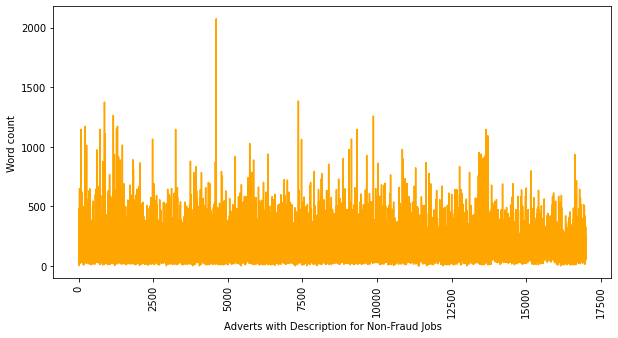

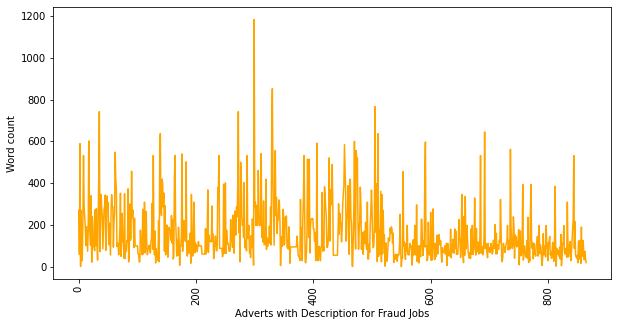

In [ ]:
desc_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].desc_len)
#print(desc_fraud)

desc_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].desc_len)
print(type(desc_nonfraud))
desc_fraud.reset_index(drop=True,inplace=True)
desc_nonfraud.reset_index(drop=True,inplace=True)

plt.figure(figsize=(10,5))
plt.plot(desc_nonfraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Description for Non-Fraud Jobs')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(desc_fraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Description for Fraud Jobs')
plt.xticks(rotation='vertical')
plt.show()


Benefits length

<class 'pandas.core.frame.DataFrame'>


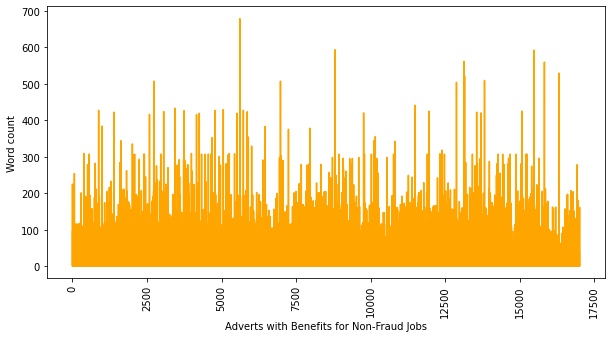

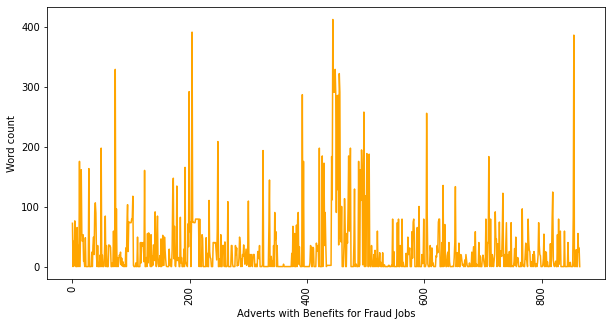

In [ ]:
benefits_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].benefits_len)
#print(desc_fraud)

benefits_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].benefits_len)
print(type(benefits_nonfraud))
benefits_fraud.reset_index(drop=True,inplace=True)
benefits_nonfraud.reset_index(drop=True,inplace=True)

plt.figure(figsize=(10,5))
plt.plot(benefits_nonfraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Benefits for Non-Fraud Jobs')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(benefits_fraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Benefits for Fraud Jobs')
plt.xticks(rotation='vertical')
plt.show()

company profile length

<class 'pandas.core.frame.DataFrame'>


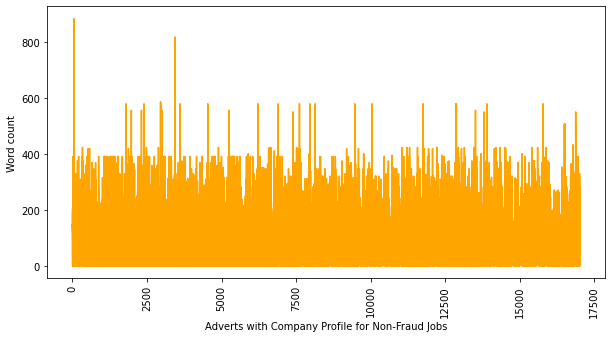

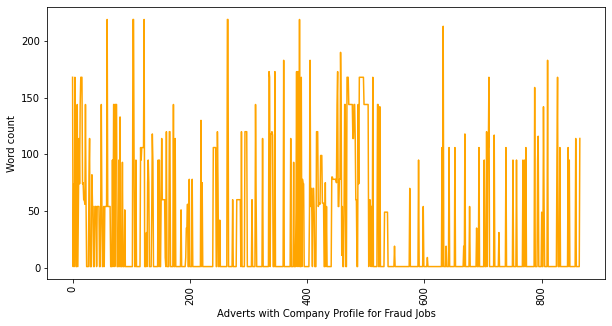

In [ ]:
compprof_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].compprof_len)
#print(desc_fraud)

compprof_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].compprof_len)
print(type(compprof_nonfraud))
compprof_fraud.reset_index(drop=True,inplace=True)
compprof_nonfraud.reset_index(drop=True,inplace=True)

plt.figure(figsize=(10,5))
plt.plot(compprof_nonfraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Company Profile for Non-Fraud Jobs')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(compprof_fraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Company Profile for Fraud Jobs')
plt.xticks(rotation='vertical')
plt.show()

<class 'pandas.core.frame.DataFrame'>


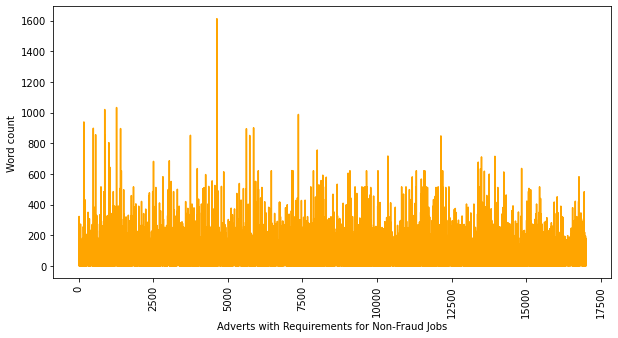

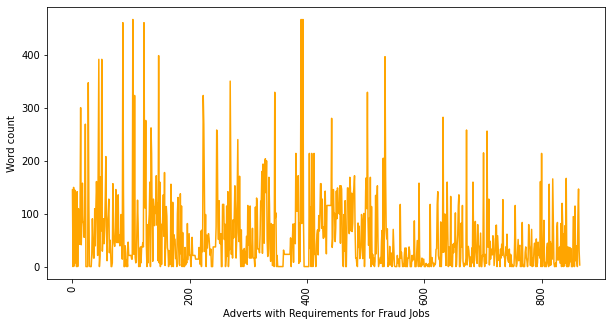

In [ ]:
req_len_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].req_len)
#print(desc_fraud)

req_len_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].req_len)
print(type(req_len_fraud))
req_len_fraud.reset_index(drop=True,inplace=True)
req_len_nonfraud.reset_index(drop=True,inplace=True)

plt.figure(figsize=(10,5))
plt.plot(req_len_nonfraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Requirements for Non-Fraud Jobs')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(req_len_fraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Requirements for Fraud Jobs')
plt.xticks(rotation='vertical')
plt.show()

Average of Length of Textual columns for Fraud and NonFraud job adverts

In [ ]:
from numpy.lib.function_base import average
print(average(compprof_fraud))
print(average(compprof_nonfraud))

print(average(desc_fraud))
print(average(desc_nonfraud))

print(average(benefits_fraud))
print(average(benefits_nonfraud))

print(average(req_len_fraud))
print(average(req_len_nonfraud)) 



32.953810623556585
94.94157752439168
157.81524249422634
171.0435523686376
30.648960739030024
30.400846361819678
58.043879907621246
79.34365816386506


In [ ]:
print("NonFraud job advert with maximum Description word count", desc_nonfraud.max())
print("NonFraud job advert with maximum Benefits word count", benefits_nonfraud.max())
print("NonFraud job advert with maximum Company Profile word count", compprof_nonfraud.max())

print("NonFraud job advert with minimum Description word count", desc_nonfraud.min())
print("NonFraud job advert with minimum Benefits word count", benefits_nonfraud.min())
print("NonFraud job advert with minimum Company Profile word count", compprof_nonfraud.min())

print("NonFraud job advert with average Description word count", desc_nonfraud.mean())
print("NonFraud job advert with average Benefits word count", benefits_nonfraud.mean())
print("NonFraud job advert with average Company Profile word count", compprof_nonfraud.mean())


print("Fraud job advert with maximum Description word count", desc_fraud.max())
print("Fraud job advert with maximum Benefits word count", benefits_fraud.max())
print("Fraud job advert with maximum Company Profile word count", compprof_fraud.max())

print("Fraud job advert with minimum Description word count", desc_fraud.min())
print("Fraud job advert with minimum Benefits word count", benefits_fraud.min())
print("Fraud job advert with minimum Company Profile word count", compprof_fraud.min())

print("Fraud job advert with average Description word count", desc_fraud.mean())
print("Fraud job advert with average Benefits word count", benefits_fraud.mean())
print("Fraud job advert with average Company Profile word count", compprof_fraud.mean())

NonFraud job advert with maximum Description word count desc_len    2074
dtype: int64
NonFraud job advert with maximum Benefits word count benefits_len    678
dtype: int64
NonFraud job advert with maximum Company Profile word count compprof_len    884
dtype: int64
NonFraud job advert with minimum Description word count desc_len    1
dtype: int64
NonFraud job advert with minimum Benefits word count benefits_len    1
dtype: int64
NonFraud job advert with minimum Company Profile word count compprof_len    1
dtype: int64
NonFraud job advert with average Description word count desc_len    171.043552
dtype: float64
NonFraud job advert with average Benefits word count benefits_len    30.400846
dtype: float64
NonFraud job advert with average Company Profile word count compprof_len    94.941578
dtype: float64
Fraud job advert with maximum Description word count desc_len    1183
dtype: int64
Fraud job advert with maximum Benefits word count benefits_len    412
dtype: int64
Fraud job advert with 

#Seaborn countplot showing most desired required education in job adverts.(Without considering NA values.

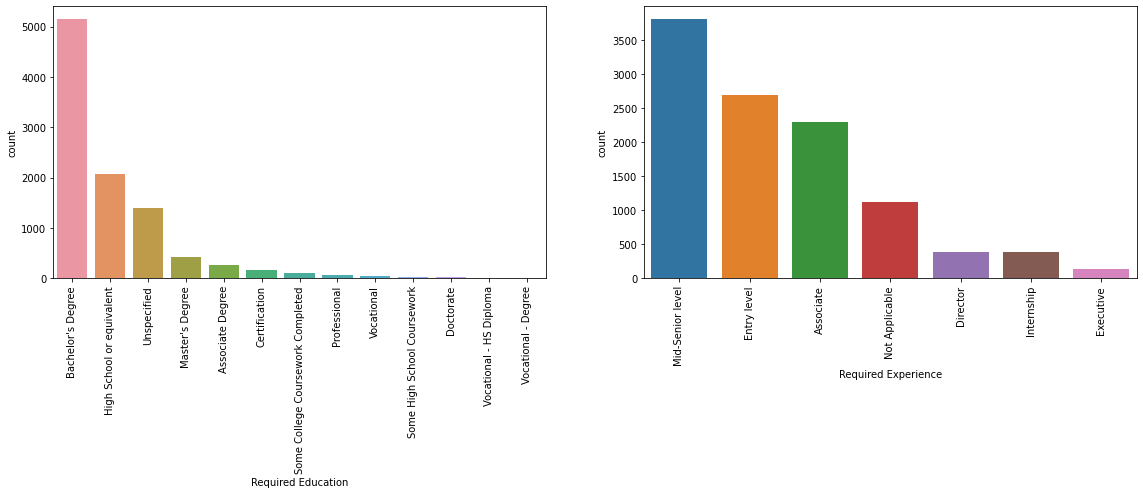

In [ ]:
plt.figure(figsize=(30,5))
fig1 = plt.subplot(1,3,1)
ax1 = sns.countplot(x=jobdf['required_education'].astype(str), data=jobdf['required_education'], order = jobdf['required_education'].value_counts().index)
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.xlabel('Required Education')

fig2 = plt.subplot(1,3,2)
ax2 = sns.countplot(x=jobdf['required_experience'].astype(str),  data=jobdf['required_experience'], order = jobdf['required_experience'].value_counts().index)
plt.setp(ax2.get_xticklabels(), rotation = 90)
plt.xlabel('Required Experience')

plt.show()

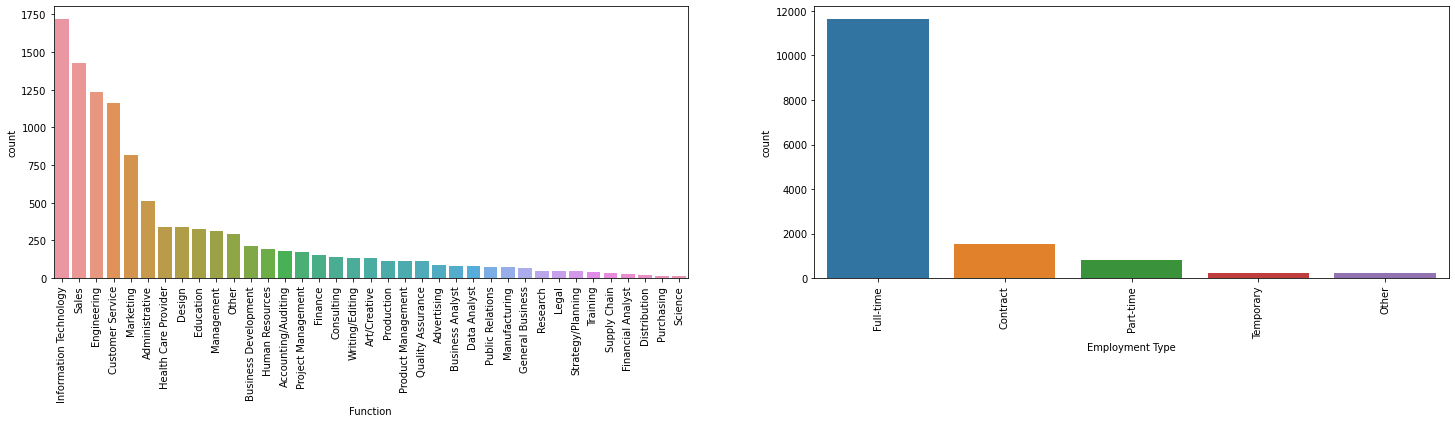

In [ ]:
frj = jobdf[jobdf['fraudulent']==0]
# fig, ax = plt.subplots()
plt.figure(figsize=(25,5))
#fig,axes = plt.subplots(1,3, figsize=(15,5))
fig1 = plt.subplot(1,2,1)
ax=sns.countplot(x=frj['function'].astype(str), data=frj, order = frj['function'].value_counts().index)
#plt.xticks(rotation='vertical')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel('Function')

fig3 = plt.subplot(1,2,2)
ax3 = sns.countplot(x=jobdf['employment_type'].astype(str), data=jobdf[jobdf['fraudulent']==1], order = jobdf['employment_type'].value_counts().index)
plt.setp(ax3.get_xticklabels(), rotation = 90)
plt.xlabel('Employment Type')

plt.show()

#This is wrong. Merged dataframe is only having 866 rows, 17k+ rows of nonfraud jobs desc is missing

In [ ]:
len_description_merged = pd.DataFrame(columns=['DescriptionFraud','DescriptionNonFraud'])
len_description_merged['DescriptionFraud'] = desc_fraud
len_description_merged['DescriptionNonFraud'] = desc_nonfraud
print(len_description_merged.head())
print(desc_fraud.shape)
print(desc_nonfraud.shape)
print(len_description_merged.shape)


   DescriptionFraud  DescriptionNonFraud
0               270                  124
1                59                  309
2               589                   50
3                 2                  345
4               270                  182
(866, 1)
(17014, 1)
(866, 2)


#Job Description word count plotted for fraud jobs and non-fraud jobs

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text major ticklabel objects>)

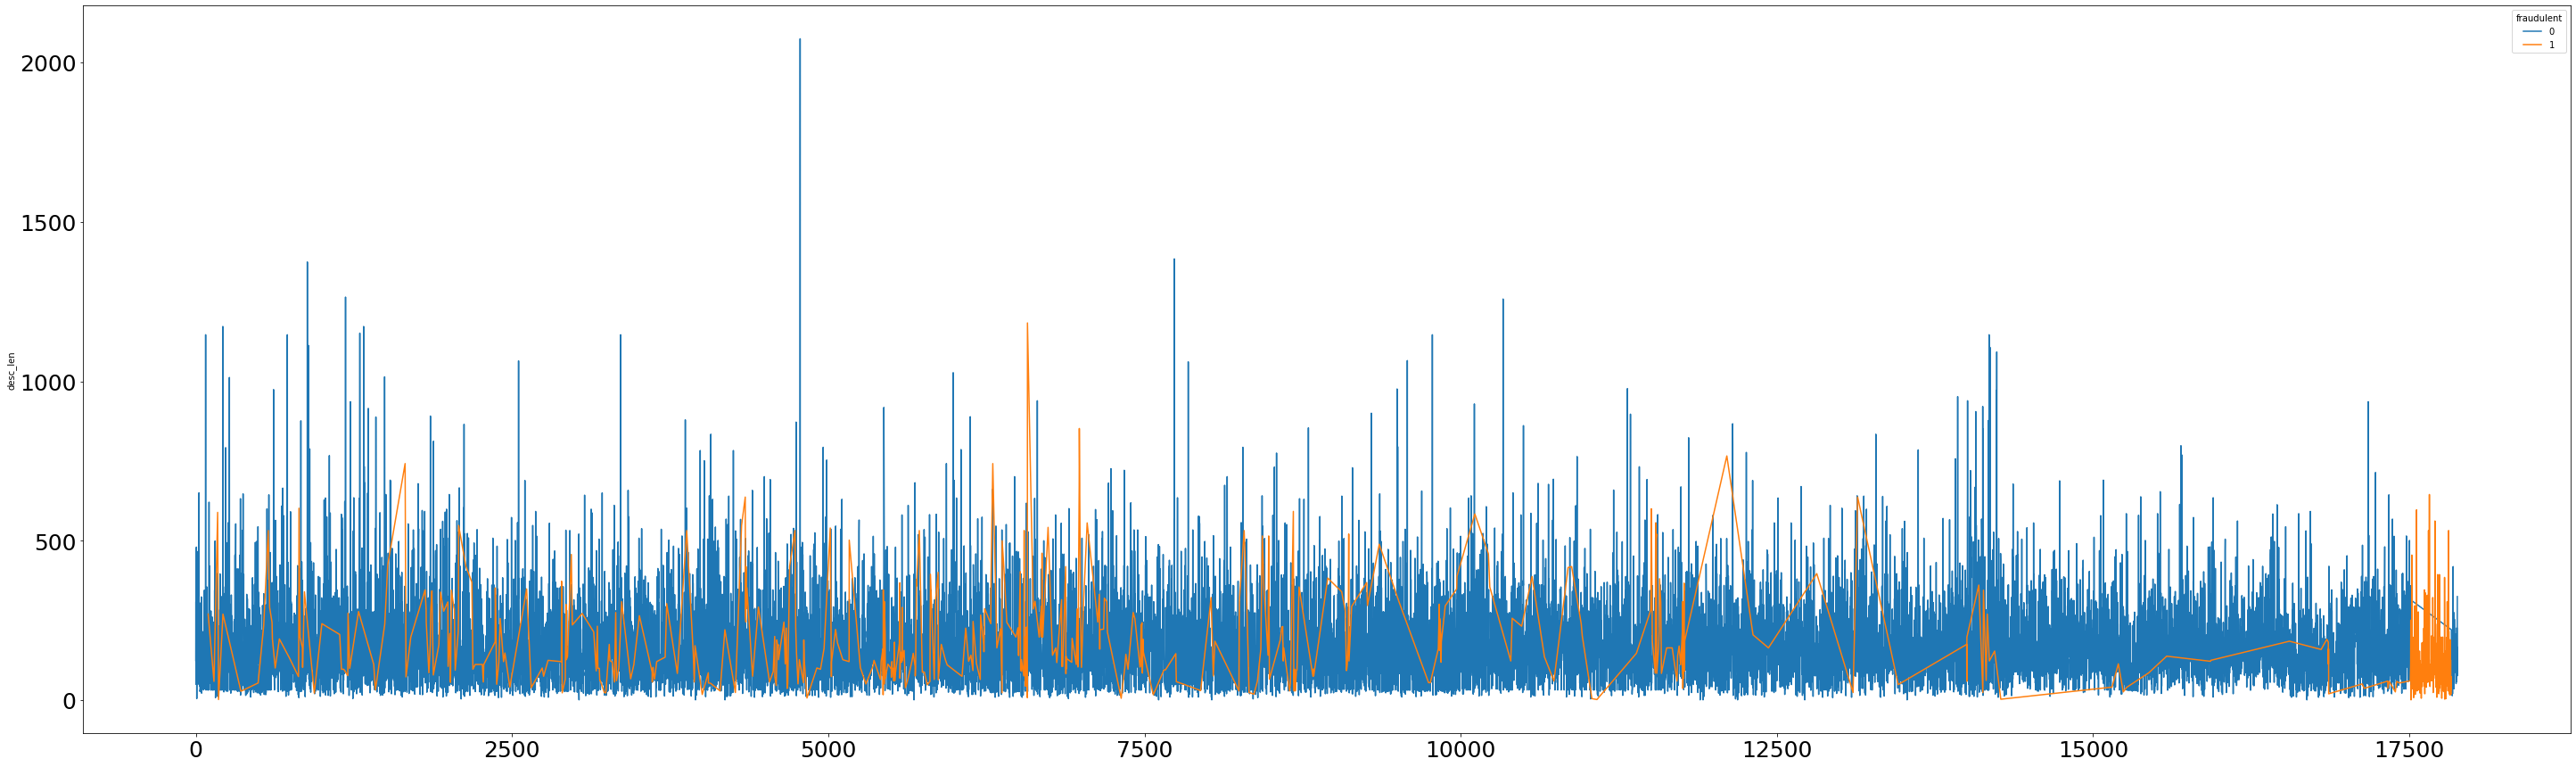

In [ ]:
from numpy.ma.core import size
plt.figure(figsize = (50,15))
sns.lineplot(x=jobdf.index, y=jobdf['desc_len'], hue=jobdf['fraudulent'], data = jobdf)
plt.xticks(size=25)
plt.yticks(size=25)

In [ ]:
print(desc_fraud['desc_len'].max())
print(desc_nonfraud['desc_len'].max())

1183
2074


6575    6576
Name: job_id, dtype: int64
1183


#KEEPING THIS UNEDITED